# Time Hippocrates: Desafio GSK de Asma

## Inicialização

In [3]:
import os
from glob import glob

import pandas as pd
from pysus.utilities.readdbc import read_dbc
from IPython.display import display
from matplotlib import pyplot as plt
import seaborn as sns

CONTEXT_MAX_ROWS_COLS = ('display.max_rows', None, 'display.max_columns', None)
DATASET_PATH_BASE = '../../../../datasets/'

## Funções

In [91]:
date_parser_dmy = lambda x: pd.to_datetime(x, format='%d%m%Y', 
                                           errors='raise',
                                           cache=True)
date_parser_ymd = lambda x: pd.to_datetime(x, format='%Y%m%d', 
                                           errors='raise',
                                           cache=True)


def load_resource_df_pf(resource_path, dtype, parse_dates, 
                        date_parser=date_parser_dmy, 
                        format='csv', encoding='utf-8'):
    if format == 'csv':
        df = pd.read_csv(resource_path,
                         dtype=dtype,
                         parse_dates=parse_dates,
                         date_parser=date_parser,)
    elif format == 'tsv':
        df = pd.read_csv(resource_path, encoding=encoding)
    else:
        raise NotImplementedError
    
    df = df.reindex(sorted(df.columns), axis=1)
    pf = pandas_profiling.ProfileReport(df)
    
    return df, pf


get_files_path = lambda p: sorted(glob(DATASET_PATH_BASE + p))


def file_base_name(file_name):
    if '.' in file_name:
        separator_index = file_name.index('.')
        base_name = file_name[:separator_index]
        return base_name
    else:
        return file_name


def path_base_name(path):
    file_name = os.path.basename(path)
    return file_base_name(file_name)


def get_resources(path_pattern, prefix_pattern='%s'):
    resources = {}
    for file_path in get_files_path(path_pattern):
        key = prefix_pattern % path_base_name(file_path).lower()
        resources[key] = file_path
    
    return resources


def _read_dbc(path, cols_numeric=[], cols_cats=[], dict_dates={}, encoding='iso-8859-1'):
    df = read_dbc(path, encoding=encoding)
    
    if len(cols_numeric):
        df[cols_numeric] = df[cols_numeric].apply(pd.to_numeric, 
                                                  errors='coerce')
    
    if len(cols_cats):
        for col in cols_cats:
            df[col] = df[col].astype('category')

    for date_format, cols in dict_dates_sia.items():
        df[cols] = df[cols].apply(pd.to_datetime, 
                                  format=date_format,
                                  errors='coerce')

    return df


def df_copy_schema(df):
    return pd.DataFrame.from_items([(name, pd.Series(data=None, dtype=series.dtype))
                                    for name, series in df.iteritems()])

reduzir_cod_municio = lambda v: str(v)[:6]

# Perguntas

## Qual a população de risco de crise de asma?

## Se previnir a crise grava com remedio sera reduzido custo da doença?

## Como indentificar regiões com gestão inadeguada no controle da asma?


## Quais tipos dados aberto estão disponíveis?

### Procedimentos (APAC) relacionados a Asma

In [5]:
APAC_ASMA = '''0302040021
0302060022
0604280068
0604280084
0604280092
0604280076
0604040016
0604040024
0604040059
0604040040
0604040032
0604040067
0604040075
0309020034
0604040091
0303140046
0302040021
0302060022
0604280068
0604280084
0604280084
0604280076
0604040016
0604040024
0604040059
0604040040
0604040032
0604040067
0604040075
0309020034
0604040091
0303140046
0302040021
0302060022
0604280068
0604280084
0604280092
0604280076
0604040016
0604040024
0604040059
0604040040
0604040032
0604040067
0604040075
0309020034
0604040091
0303140046'''.split('\n')

### [Datasus: SIA AM - APAC de Medicamentos]()

#### Dados: Dicionário

In [1]:
cols_cat = ['AP_CONDIC', 'AP_CNSPCN', 'AP_SEXO', 'AP_CIDCAS', 'AP_CIDPRI', 'AP_CIDSEC', 
            'AM_TRANSPL', 'AM_GESTANT', 'AP_PRIPAL', 'AP_MN_IND',
            'AP_CNPJCPF', 'AP_CNPJMNT', 'AP_CEPPCN', 'AP_CODEMI',
            'AP_CATEND', 'AP_APACANT', 'AP_UNISOL', 'AP_ETNIA', 'AP_NATJUR',
            'AP_GESTAO', 'AP_CODUNI', 'AP_AUTORIZ', 'AP_UFMUN', 'AP_TPUPS',
            'AP_TIPPRE', 'AP_COIDADE', 'AP_RACACOR', 'AP_MUNPCN', 'AP_UFNACIO',
            'AP_UFDIF', 'AP_MNDIF', 'AP_OBITO', 'AP_TRANSF', 'AP_ALTA', 'AP_ENCERR',
            'AP_TPATEN', 'AP_TPAPAC', 'AP_PERMAN', 'AP_MOTSAI']

cols_numeric_sia = ['AP_VL_AP', 'AP_NUIDADE', 'AM_PESO', 'AM_ALTURA', 'AM_QTDTRAN']

dict_dates_sia = {
    '%Y%m': ['AP_MVM', 'AP_CMP', 'AP_MVM', 'AP_CMP'],
    '%Y%m%d': ['AP_DTINIC', 'AP_DTFIM', 'AP_DTOCOR', 
               'AP_DTSOLIC', 'AP_DTAUT']
}

#### Dados: Amostra

In [5]:
df_sia_ma_sample = _read_dbc('../../../../datasets/datasus/siasus/data-raw/AMES1810.dbc',
                             cols_numeric=cols_numeric_sia,
                             cols_cats=cols_cat,
                             dict_dates=dict_dates_sia,
                             encoding='latin-1')

In [6]:
with pd.option_context(*CONTEXT_MAX_ROWS_COLS):
    display(df_sia_ma_sample.head())

,AP_MVM,AP_CONDIC,AP_GESTAO,AP_CODUNI,AP_AUTORIZ,AP_CMP,AP_PRIPAL,AP_VL_AP,AP_UFMUN,AP_TPUPS,AP_TIPPRE,AP_MN_IND,AP_CNPJCPF,AP_CNPJMNT,AP_CNSPCN,AP_COIDADE,AP_NUIDADE,AP_SEXO,AP_RACACOR,AP_MUNPCN,AP_UFNACIO,AP_CEPPCN,AP_UFDIF,AP_MNDIF,AP_DTINIC,AP_DTFIM,AP_TPATEN,AP_TPAPAC,AP_MOTSAI,AP_OBITO,AP_ENCERR,AP_PERMAN,AP_ALTA,AP_TRANSF,AP_DTOCOR,AP_CODEMI,AP_CATEND,AP_APACANT,AP_UNISOL,AP_DTSOLIC,AP_DTAUT,AP_CIDCAS,AP_CIDPRI,AP_CIDSEC,AP_ETNIA,AM_PESO,AM_ALTURA,AM_TRANSPL,AM_QTDTRAN,AM_GESTANT,AP_NATJUR
0,2018-10-01,EP,320000,2448467,3218201121839,2018-10-01,0604330022,0.0,320150,36,00,M,27080605001753,27080605000196,}|{{{|{{{,4,82,M,99,320150,010,29716040,0,1,2018-08-01,2018-10-30,06,2,21,0,0,1,0,0,NaT,E320000003,01,0000000000000,2448467,2018-08-10,NaT,0000,I200,0000,,68,183,N,0,N,1023
1,2018-10-01,EP,320000,2448467,3218201116460,2018-10-01,0604330022,0.0,320150,36,00,M,27080605001753,27080605000196,{{}~|~,4,65,M,99,320150,010,29705229,0,1,2018-08-01,2018-10-30,06,2,21,0,0,1,0,0,NaT,E320000003,01,0000000000000,2448467,2018-07-31,NaT,0000,I200,0000,,55,172,N,0,N,1023
2,2018-10-01,EP,320000,2448467,3218201116471,2018-10-01,0604330022,0.0,320150,36,00,M,27080605001753,27080605000196,{{}~~{},4,85,M,99,320150,010,29703330,0,1,2018-08-01,2018-10-30,06,2,21,0,0,1,0,0,NaT,E320000003,01,0000000000000,2448467,2018-07-31,NaT,0000,I200,0000,,75,170,N,0,N,1023
3,2018-10-01,EP,320000,2448467,3218201119562,2018-10-01,0604330022,0.0,320150,36,00,M,27080605001753,27080605000196,{{}~{|,4,63,F,99,320150,010,29702810,0,1,2018-08-01,2018-10-30,06,2,21,0,0,1,0,0,NaT,E320000003,01,0000000000000,2448467,2018-08-07,NaT,0000,I200,0000,,76,160,N,0,N,1023
4,2018-10-01,EP,320000,2448467,3218201156380,2018-10-01,0604330022,0.0,320150,36,00,M,27080605001753,27080605000196,{{{{}}|}{},4,68,F,99,320150,010,29707870,0,1,2018-10-01,2018-12-30,06,1,21,0,0,1,0,0,NaT,E320000003,01,0000000000000,2448467,2018-10-10,NaT,0000,I249,0000,,76,165,N,0,N,1023


In [7]:
df_sia_ma_sample[df_sia_ma_sample.AP_PRIPAL.isin(APAC_ASMA)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4586 entries, 45 to 51792
Data columns (total 51 columns):
AP_MVM        4586 non-null datetime64[ns]
AP_CONDIC     4586 non-null category
AP_GESTAO     4586 non-null category
AP_CODUNI     4586 non-null category
AP_AUTORIZ    4586 non-null category
AP_CMP        4586 non-null datetime64[ns]
AP_PRIPAL     4586 non-null category
AP_VL_AP      4586 non-null float64
AP_UFMUN      4586 non-null category
AP_TPUPS      4586 non-null category
AP_TIPPRE     4586 non-null category
AP_MN_IND     4586 non-null category
AP_CNPJCPF    4586 non-null category
AP_CNPJMNT    4586 non-null category
AP_CNSPCN     4586 non-null category
AP_COIDADE    4586 non-null category
AP_NUIDADE    4586 non-null int64
AP_SEXO       4586 non-null category
AP_RACACOR    4586 non-null category
AP_MUNPCN     4586 non-null category
AP_UFNACIO    4586 non-null category
AP_CEPPCN     4586 non-null category
AP_UFDIF      4586 non-null category
AP_MNDIF      4586 non-null cate

#### Variável: `AP_PRIPAL` - Procedimento Principal da APAC, Medicamentos

0604500017    2936
0604040040    2726
0604650027    2690
0604230028    1764
0604040024    1562
0604360029    1503
0604590024    1479
0604130023    1440
0604510020    1342
0604230044    1185
0604430019    1158
0604230010    1140
0604230036    1084
0604500050    1065
0604470045     958
0604330022     948
0604080026     925
0604360037     906
0604230052     884
0604530013     862
0604320043     793
0604740018     776
0604460058     755
0604230087     732
0604500025     664
0604650035     657
0604470029     650
0604030061     606
0604510012     605
0604380011     589
              ... 
0604750030       5
0604090013       4
0604390041       4
0604270011       4
0604620047       4
0604290063       3
0604750048       3
0604240023       3
0604320027       3
0604560010       3
0604380020       3
0604390084       3
0604220014       2
0604120010       2
0604060017       2
0604050046       2
0604290080       2
0604010087       2
0604150016       1
0604350031       1
0604640030       1
0604160020  

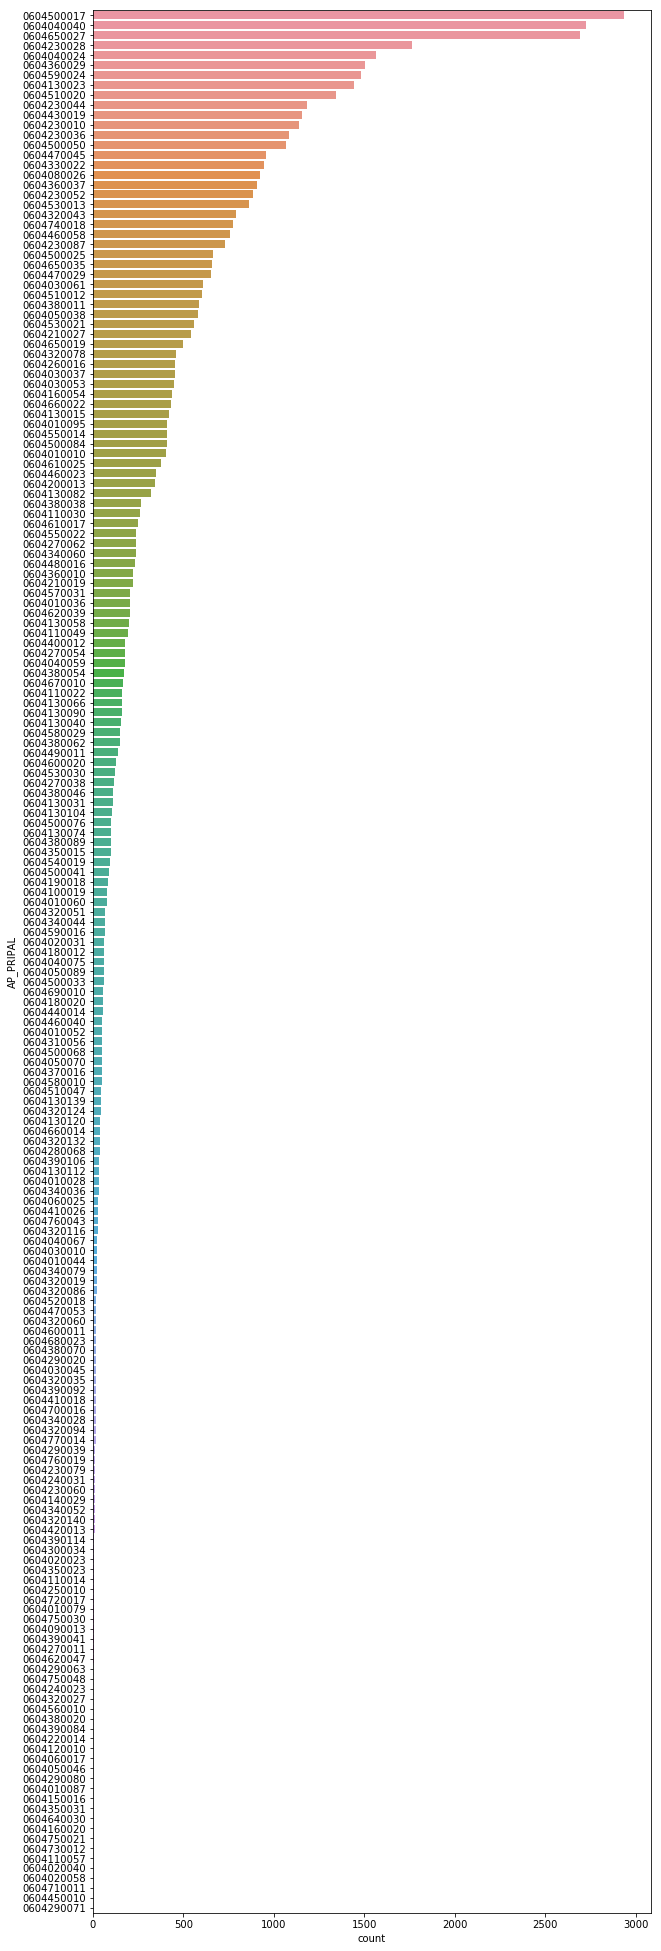

In [8]:
df_sia_ma_sample_ap_pripal_vc = df_sia_ma_sample.AP_PRIPAL.value_counts()
plt.figure(figsize=(10,35))
g = sns.countplot(y="AP_PRIPAL", 
                  data=df_sia_ma_sample, 
                  order=df_sia_ma_sample_ap_pripal_vc.index)
display(g)
display(df_sia_ma_sample_ap_pripal_vc)

#### Pergunta: Quantos registros contendo algum predimento relacionado ao CIDs de Asmas existem no Espírito Santo no ano de 2016, 2017, 2018 e 2019? 

In [6]:
# Dados de Asma
sia_am_es_16_res = get_resources('datasus/siasus/data-raw/AMES16*')
sia_am_es_17_res = get_resources('datasus/siasus/data-raw/AMES17*')
sia_am_es_18_res = get_resources('datasus/siasus/data-raw/AMES18*')
sia_am_es_19_res = get_resources('datasus/siasus/data-raw/AMES19*')

sia_am_es_res = {}
sia_am_es_res.update(sia_am_es_16_res)
sia_am_es_res.update(sia_am_es_17_res)
sia_am_es_res.update(sia_am_es_18_res)
sia_am_es_res.update(sia_am_es_19_res)
sia_am_es_res

{'ames1601': '../../../../datasets/datasus/siasus/data-raw/AMES1601.dbc',
 'ames1602': '../../../../datasets/datasus/siasus/data-raw/AMES1602.dbc',
 'ames1603': '../../../../datasets/datasus/siasus/data-raw/AMES1603.dbc',
 'ames1604': '../../../../datasets/datasus/siasus/data-raw/AMES1604.dbc',
 'ames1605': '../../../../datasets/datasus/siasus/data-raw/AMES1605.dbc',
 'ames1606': '../../../../datasets/datasus/siasus/data-raw/AMES1606.dbc',
 'ames1607': '../../../../datasets/datasus/siasus/data-raw/AMES1607.dbc',
 'ames1608': '../../../../datasets/datasus/siasus/data-raw/AMES1608.dbc',
 'ames1609': '../../../../datasets/datasus/siasus/data-raw/AMES1609.dbc',
 'ames1610': '../../../../datasets/datasus/siasus/data-raw/AMES1610.dbc',
 'ames1611': '../../../../datasets/datasus/siasus/data-raw/AMES1611.dbc',
 'ames1612': '../../../../datasets/datasus/siasus/data-raw/AMES1612.dbc',
 'ames1701': '../../../../datasets/datasus/siasus/data-raw/AMES1701.dbc',
 'ames1702': '../../../../datasets/dat

In [10]:
def _read_dbc_sia_am_asma(file_path):
    df = _read_dbc(file_path, 
                   cols_numeric_sia, 
                   cols_cat, 
                   dict_dates_sia, 
                   'latin-1')
    df_part = df[df.AP_PRIPAL.isin(APAC_ASMA)]

    return df_part

df_sia_ma_es_asma_frames = [_read_dbc_sia_am_asma(v) for v in sia_am_es_18_res.values()]

df_sia_ma_es_asma = pd.concat(df_sia_ma_es_asma_frames)
df_sia_ma_es_asma.shape

(51934, 51)

In [11]:
with pd.option_context(*CONTEXT_MAX_ROWS_COLS):
    display(df_sia_ma_es_asma.head())

,AP_MVM,AP_CONDIC,AP_GESTAO,AP_CODUNI,AP_AUTORIZ,AP_CMP,AP_PRIPAL,AP_VL_AP,AP_UFMUN,AP_TPUPS,AP_TIPPRE,AP_MN_IND,AP_CNPJCPF,AP_CNPJMNT,AP_CNSPCN,AP_COIDADE,AP_NUIDADE,AP_SEXO,AP_RACACOR,AP_MUNPCN,AP_UFNACIO,AP_CEPPCN,AP_UFDIF,AP_MNDIF,AP_DTINIC,AP_DTFIM,AP_TPATEN,AP_TPAPAC,AP_MOTSAI,AP_OBITO,AP_ENCERR,AP_PERMAN,AP_ALTA,AP_TRANSF,AP_DTOCOR,AP_CODEMI,AP_CATEND,AP_APACANT,AP_UNISOL,AP_DTSOLIC,AP_DTAUT,AP_CIDCAS,AP_CIDPRI,AP_CIDSEC,AP_ETNIA,AM_PESO,AM_ALTURA,AM_TRANSPL,AM_QTDTRAN,AM_GESTANT,AP_NATJUR
70,2018-01-01,EP,320000,2569043,3217200215295,2018-01-01,0604280068,0.0,320120,02,00,M,27080605000510,27080605000196,{{{{}~{,4,73,F,99,320120,010,29315318,0,1,2017-11-01,2018-01-30,06,2,21,0,0,1,0,0,NaT,E320000002,01,0000000000000,2569043,2017-11-06,NaT,0000,J450,0000,,71,157,N,0,N,1023
76,2018-01-01,EP,320000,2448467,3217200500437,2018-01-01,0604040024,0.0,320150,36,00,M,27080605001753,27080605000196,{{|{}}|~|,4,69,F,99,320150,010,29700437,0,1,2017-12-01,2018-02-28,06,2,21,0,0,1,0,0,NaT,E320000003,01,0000000000000,2448467,2017-12-19,NaT,0000,J448,0000,,52,148,N,0,N,1023
77,2018-01-01,EP,320000,2466120,3217201979893,2018-01-01,0604040024,0.0,320520,43,00,M,27080605000196,27080605000196,{{|{},4,76,F,99,320520,010,29112160,0,1,2017-11-01,2018-01-30,06,2,21,0,0,1,0,0,NaT,E320000001,01,0000000000000,2466120,2017-11-16,NaT,0000,J440,0000,,53,0,N,0,N,1023
78,2018-01-01,EP,320000,2466120,3217201975427,2018-01-01,0604040024,0.0,320520,43,00,M,27080605000196,27080605000196,{{{{{{{,4,62,F,99,320520,010,29107358,0,1,2017-11-02,2018-01-31,06,2,21,0,0,1,0,0,NaT,E320000001,01,0000000000000,2466120,2017-10-17,NaT,0000,J448,0000,,66,0,N,0,N,1023
79,2018-01-01,EP,320000,2466120,3218202433039,2018-01-01,0604040024,0.0,320520,43,00,M,27080605000196,27080605000196,{{{|{~~,4,68,M,99,320240,010,29200480,0,1,2018-01-01,2018-03-30,06,1,21,0,0,1,0,0,NaT,E320000001,01,0000000000000,2466120,2018-01-24,NaT,0000,J440,0000,,70,0,N,0,N,1023


In [14]:
with pd.option_context(*CONTEXT_MAX_ROWS_COLS):
    display(df_sia_ma_es_asma.AP_PRIPAL.value_counts())

0604040040    31006
0604040024    17466
0604040059     2130
0604040075      619
0604280068      423
0604040067      275
0604280076       10
0604040091        5
Name: AP_PRIPAL, dtype: int64

### Dados geográficos e demográficos

#### CEP `df_correrios_ceplog`

In [13]:
df_correrios_ceplog = pd.read_csv(DATASET_PATH_BASE+'geocoordinates/geocoordinates-br-correios-ceplog-2017-06.tar.gz',
                                  sep=';',
                                  error_bad_lines=False,
                                  dtype={
                                      'correios-ceplog-2017-06-utf8.txt': 'int32'
                                  },
                                  usecols=['correios-ceplog-2017-06-utf8.txt','UF', 'Tipo_Acento', 'Bairro1_Acento','latitude', 'longitude'])

df_correrios_ceplog.rename(columns={'correios-ceplog-2017-06-utf8.txt':'CEP'}, inplace=True)
df_correrios_ceplog['latitude'] = pd.to_numeric(df_correrios_ceplog['latitude'], downcast='float', errors='coerce')
df_correrios_ceplog['longitude'] = pd.to_numeric(df_correrios_ceplog['longitude'], downcast='float', errors='coerce')

In [14]:
df_correrios_ceplog.head()

,CEP,CHAVE,UF,Tipo_Oficial,Tipo_Acento,Nome_Oficial,Nome_Acento,Bairro1_Oficial,Bairro1_Acento,LIMINFPAR,LIMINFIMPA,LIMSUPPAR,LIMSUPIMPA,FLAGS,LADOS,latitude,longitude
0,13568693,13560,SP,TRAVESSA,TRAVESSA,MARIA DA CONCEICAO HERMES,MARIA DA CONCEIÇÃO HERMES,RESIDENCIAL PARQUE DOURADINHO,RESIDENCIAL PARQUE DOURADINHO,"0,00","0,00","99999999,00","99999999,00","0,00","17,00",-22.018085,-47.848595
1,13568695,13560,SP,TRAVESSA,TRAVESSA,WALTER BAGNATO,WALTER BAGNATO,RESIDENCIAL PARQUE DOURADINHO,RESIDENCIAL PARQUE DOURADINHO,"0,00","0,00","99999999,00","99999999,00","0,00","17,00",-22.017389,-47.850056
2,13568698,13560,SP,TRAVESSA,TRAVESSA,JOAO ANTONIO TORNICH,JOÃO ANTÔNIO TORNICH,RESIDENCIAL PARQUE DOURADINHO,RESIDENCIAL PARQUE DOURADINHO,"0,00","0,00","99999999,00","99999999,00","0,00","17,00",-22.016893,-47.850300
3,13568700,13560,SP,TRAVESSA,TRAVESSA,SALIM KARAM,SALIM KARAM,RESIDENCIAL PARQUE DOURADINHO,RESIDENCIAL PARQUE DOURADINHO,"0,00","0,00","99999999,00","99999999,00","0,00","17,00",-22.016867,-47.850681
4,13568703,13560,SP,TRAVESSA,TRAVESSA,7,7,RESIDENCIAL PARQUE DOURADINHO,RESIDENCIAL PARQUE DOURADINHO,"0,00","0,00","99999999,00","99999999,00","0,00","17,00",-22.051586,-47.919071


In [9]:
df_correrios_ceplog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021723 entries, 0 to 1021722
Data columns (total 6 columns):
CEP               1021723 non-null int32
UF                1021723 non-null object
Tipo_Acento       992639 non-null object
Bairro1_Acento    1019465 non-null object
latitude          1008893 non-null float32
longitude         1008893 non-null float32
dtypes: float32(2), int32(1), object(3)
memory usage: 35.1+ MB


#### IBGE Censo `df_ibge_censo_es`

In [21]:
df_ibge_censo_es = pd.read_excel(DATASET_PATH_BASE+'ibge/censo-2010/total_populacao_espirito_santo.xls')
df_ibge_censo_es.head()

,Código do município,Nome do município,Total da população 2000,Total de homens,Total de mulheres,Total da população urbana,Total da população rural,Total da população 2010
0,3200102,Afonso Cláudio,32232.0,15684.0,15402.0,15861.0,15225.0,31086.0
1,3200169,Água Doce do Norte,12751.0,5956.0,5815.0,6699.0,5072.0,11771.0
2,3200136,Águia Branca,9599.0,4900.0,4617.0,3051.0,6466.0,9517.0
3,3200201,Alegre,31714.0,15288.0,15496.0,21521.0,9263.0,30784.0
4,3200300,Alfredo Chaves,13616.0,7107.0,6853.0,6557.0,7403.0,13960.0


In [28]:
df_ibge_censo_es['Código do município Reduzido'] = df_ibge_censo_es['Código do município'].apply(reduzir_cod_municio)

In [29]:
df_ibge_censo_es.head()

,Código do município,Nome do município,Total da população 2000,Total de homens,Total de mulheres,Total da população urbana,Total da população rural,Total da população 2010,Código do município Reduzido
0,3200102,Afonso Cláudio,32232.0,15684.0,15402.0,15861.0,15225.0,31086.0,320010
1,3200169,Água Doce do Norte,12751.0,5956.0,5815.0,6699.0,5072.0,11771.0,320016
2,3200136,Águia Branca,9599.0,4900.0,4617.0,3051.0,6466.0,9517.0,320013
3,3200201,Alegre,31714.0,15288.0,15496.0,21521.0,9263.0,30784.0,320020
4,3200300,Alfredo Chaves,13616.0,7107.0,6853.0,6557.0,7403.0,13960.0,320030


#### Atlas da Vulnerabilidade Social - Ipea `df_ipea_ivs`

In [92]:
df_ipea_ivs = pd.read_excel(DATASET_PATH_BASE+'ipea/ipea-ivs-es.xlsx',
                            dtype={
                                'Município com 6 dígitos': 'str'
                            })

with pd.option_context(*CONTEXT_MAX_ROWS_COLS):
    display(df_ipea_ivs.head())

,UF,Nome da UF,Município,Nome do Município,Município com 6 dígitos,Ano,IVS,IVS Infraestrutura Urbana,IVS Capital Humano,IVS Renda e Trabalho,% de pessoas em domicílios com abastecimento de água e esgotamento sanitário inadequados,% da população que vive em domicílios urbanos sem o serviço de coleta de lixo,% de pessoas que vivem em domicílios com renda per capita inferior a meio salário mínimo (de 2010) e que gastam mais de uma hora até o trabalho,Mortalidade até 1 ano de idade,% de crianças de 0 a 5 anos que não frequentam a escola,% de pessoas de 6 a 14 anos que não frequentam a escola,% de mulheres de 10 a 17 anos que tiveram filhos,"% de mães chefes de família, sem fundamental completo e com filho menor de 15 anos de idade",Taxa de analfabetismo da população de 15 anos ou mais de idade,% de crianças que vivem em domicílios em que nenhum dos moradores tem o ensino fundamental completo,"% de pessoas de 15 a 24 anos que não estudam, não trabalham e possuem renda domiciliar per capita igual ou inferior a meio salário mínimo (de 2010)",Proporção de pessoas com renda domiciliar per capita igual ou inferior a meio salário mínimo (de 2010),Taxa de desocupação da população de 18 anos ou mais de idade,% de pessoas de 18 anos ou mais sem fundamental completo e em ocupação informal,% de pessoas em domicílios com renda per capita inferior a meio salário mínimo (de 2010) e dependentes de idosos,Taxa de atividade das pessoas de 10 a 14 anos de idade,IDHM,IDHM Longevidade,IDHM Educação,IDHM Renda,Esperança de vida ao nascer,Subíndice de escolaridade - IDHM Educação,% de 18 anos ou mais com fundamental completo,Subíndice de frequência escolar - IDHM Educação,% de 5 a 6 anos na escola,% de 11 a 13 anos nos anos finais do fundamental ou com fundamental completo,% de 15 a 17 anos com fundamental completo,% de 18 a 20 anos com médio completo,Renda per capita,Prosperidade Social,População total,Mortalidade até 5 anos de idade,Razão de dependência,Taxa de fecundidade total,Taxa de envelhecimento,População vulnerável de 15 a 24 anos,Mulheres chefes de família e com filhos menores de 15 anos,População ocupada vulnerável à pobreza que retorna diariamente do trabalho,População em domicílios vulneráveis e com idoso,População de até 1 ano,População de 1 a 3 anos,População de 4 anos,População de 5 anos,População de 6 anos,População de 6 a 10 anos,População de 6 a 17 anos,População de 11 a 13 anos,População de 11 a 14 anos,População de 12 a 14 anos,População de 15 anos ou mais,População de 15 a 17 anos,População de 15 a 24 anos,População de 16 a 18 anos,População de 18 anos ou mais,População de 18 a 20 anos,População de 18 a 24 anos,População de 19 a 21 anos,População de 25 anos ou mais,População de 65 anos ou mais,PEA - 10 anos ou mais,PEA - 10 a 14 anos,PEA - 15 a 17 anos,PEA - 18 anos ou mais,Taxa de analfabetismo - 18 anos ou mais,Taxa de analfabetismo - 25 anos ou mais,Renda per capita dos vulneráveis à pobreza,% da renda proveniente de rendimentos do trabalho,Índice de Gini,% de empregados com carteira - 18 anos ou mais,% de empregados sem carteira - 18 anos ou mais,% de trabalhadores do setor público - 18 anos ou mais,% de trabalhadores por conta própria - 18 anos ou mais,% de empregadores - 18 anos ou mais,Grau de formalização dos ocupados - 18 anos ou mais,% dos ocupados com fundamental completo - 18 anos ou mais,% dos ocupados com médio completo - 18 anos ou mais,% dos ocupados com superior completo - 18 anos ou mais,Rendimento médio dos ocupados - 18 anos ou mais,% dos ocupados sem rendimento - 18 anos ou mais
0,32,Espírito Santo,3200102,Afonso Cláudio,320010,2000,0.416,0.179,0.538,0.531,7.55,6.10,3.87,25.23,84.26,12.80,1.63,10.77,19.31,62.93,14.73,58.04,2.74,69.60,3.15,25.65,0.553,0.740,0.374,0.612,69.39,0.236,23.56,0.471,57.88,59.05,45.75,25.58,359.81,NaN,32232,29.33,54.90,2.40,6.73,3917,398,NaN,2087,566,1593,600,637,601,3115,7946,2029,2743,2100,22978,2088,6644,2123,20890,2108,4556,2044,16334,2170,16789,874,971,14944,20.87,25.09,128.74,80.2

In [93]:
df_ipea_ivs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 89 columns):
UF                                                                                                                                                     156 non-null int64
Nome da UF                                                                                                                                             156 non-null object
Município                                                                                                                                              156 non-null int64
Nome do Município                                                                                                                                      156 non-null object
Município com 6 dígitos                                                                                                                                156 non-null object
Ano                                       

# Pré Processamento

## Datasus SIA AM + População 2010 por município

In [164]:
df_sia_ma_es_asma_ext = pd.merge(df_sia_ma_es_asma, 
                                 df_ibge_censo_es,  
                                 how='left',
                                 left_on=['AP_MUNPCN'],
                                 right_on=['Código do município Reduzido'])

with pd.option_context(*CONTEXT_MAX_ROWS_COLS):
    display(df_sia_ma_es_asma_ext.head())
    display(df_sia_ma_es_asma_ext.info())

,AP_MVM,AP_CONDIC,AP_GESTAO,AP_CODUNI,AP_AUTORIZ,AP_CMP,AP_PRIPAL,AP_VL_AP,AP_UFMUN,AP_TPUPS,AP_TIPPRE,AP_MN_IND,AP_CNPJCPF,AP_CNPJMNT,AP_CNSPCN,AP_COIDADE,AP_NUIDADE,AP_SEXO,AP_RACACOR,AP_MUNPCN,AP_UFNACIO,AP_CEPPCN,AP_UFDIF,AP_MNDIF,AP_DTINIC,AP_DTFIM,AP_TPATEN,AP_TPAPAC,AP_MOTSAI,AP_OBITO,AP_ENCERR,AP_PERMAN,AP_ALTA,AP_TRANSF,AP_DTOCOR,AP_CODEMI,AP_CATEND,AP_APACANT,AP_UNISOL,AP_DTSOLIC,AP_DTAUT,AP_CIDCAS,AP_CIDPRI,AP_CIDSEC,AP_ETNIA,AM_PESO,AM_ALTURA,AM_TRANSPL,AM_QTDTRAN,AM_GESTANT,AP_NATJUR,Código do município,Nome do município,Total da população 2000,Total de homens,Total de mulheres,Total da população urbana,Total da população rural,Total da população 2010,Código do município Reduzido
0,2018-01-01,EP,320000,2569043,3217200215295,2018-01-01,0604280068,0.0,320120,02,00,M,27080605000510,27080605000196,{{{{}~{,4,73,F,99,320120,010,29315318,0,1,2017-11-01,2018-01-30,06,2,21,0,0,1,0,0,NaT,E320000002,01,0000000000000,2569043,2017-11-06,NaT,0000,J450,0000,,71,157,N,0,N,1023,3201209,Cachoeiro de Itapemirim,174879.0,92751.0,97127.0,173572.0,16306.0,189878.0,320120
1,2018-01-01,EP,320000,2448467,3217200500437,2018-01-01,0604040024,0.0,320150,36,00,M,27080605001753,27080605000196,{{|{}}|~|,4,69,F,99,320150,010,29700437,0,1,2017-12-01,2018-02-28,06,2,21,0,0,1,0,0,NaT,E320000003,01,0000000000000,2448467,2017-12-19,NaT,0000,J448,0000,,52,148,N,0,N,1023,3201506,Colatina,112711.0,54303.0,57491.0,98395.0,13399.0,111794.0,320150
2,2018-01-01,EP,320000,2466120,3217201979893,2018-01-01,0604040024,0.0,320520,43,00,M,27080605000196,27080605000196,{{|{},4,76,F,99,320520,010,29112160,0,1,2017-11-01,2018-01-30,06,2,21,0,0,1,0,0,NaT,E320000001,01,0000000000000,2466120,2017-11-16,NaT,0000,J440,0000,,53,0,N,0,N,1023,3205200,Vila Velha,345965.0,199083.0,215337.0,412402.0,2018.0,414420.0,320520
3,2018-01-01,EP,320000,2466120,3217201975427,2018-01-01,0604040024,0.0,320520,43,00,M,27080605000196,27080605000196,{{{{{{{,4,62,F,99,320520,010,29107358,0,1,2017-11-02,2018-01-31,06,2,21,0,0,1,0,0,NaT,E320000001,01,0000000000000,2466120,2017-10-17,NaT,0000,J448,0000,,66,0,N,0,N,1023,3205200,Vila Velha,345965.0,199083.0,215337.0,412402.0,2018.0,414420.0,320520
4,2018-01-01,EP,320000,2466120,3218202433039,2018-01-01,0604040024,0.0,320520,43,00,M,27080605000196,27080605000196,{{{|{~~,4,68,M,99,320240,010,29200480,0,1,2018-01-01,2018-03-30,06,1,21,0,0,1,0,0,NaT,E320000001,01,0000000000000,2466120,2018-01-24,NaT,0000,J440,0000,,70,0,N,0,N,1023,3202405,Guarapari,88400.0,51424.0,53803.0,100268.0,4959.0,105227.0,320240


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51934 entries, 0 to 51933
Data columns (total 60 columns):
AP_MVM                          51934 non-null datetime64[ns]
AP_CONDIC                       51934 non-null category
AP_GESTAO                       51934 non-null category
AP_CODUNI                       51934 non-null category
AP_AUTORIZ                      51934 non-null object
AP_CMP                          51934 non-null datetime64[ns]
AP_PRIPAL                       51934 non-null object
AP_VL_AP                        51934 non-null float64
AP_UFMUN                        51934 non-null category
AP_TPUPS                        51934 non-null category
AP_TIPPRE                       51934 non-null category
AP_MN_IND                       51934 non-null category
AP_CNPJCPF                      51934 non-null category
AP_CNPJMNT                      51934 non-null category
AP_CNSPCN                       51934 non-null object
AP_COIDADE                      51934 non-null

None

## Datasus SIA AM: Contagem por mês de procedimentos por município

In [165]:
df_sia_ma_es_asma_ext['AP_DTINIC_ANO_MES'] = df_sia_ma_es_asma_ext['AP_DTINIC'].dt.to_period('M')
df_sia_ma_es_asma_ext['AP_DTSOLIC_ANO_MES'] = df_sia_ma_es_asma_ext['AP_DTSOLIC'].dt.to_period('M')

with pd.option_context(*CONTEXT_MAX_ROWS_COLS):
    display(df_sia_ma_es_asma_ext.head())

,AP_MVM,AP_CONDIC,AP_GESTAO,AP_CODUNI,AP_AUTORIZ,AP_CMP,AP_PRIPAL,AP_VL_AP,AP_UFMUN,AP_TPUPS,AP_TIPPRE,AP_MN_IND,AP_CNPJCPF,AP_CNPJMNT,AP_CNSPCN,AP_COIDADE,AP_NUIDADE,AP_SEXO,AP_RACACOR,AP_MUNPCN,AP_UFNACIO,AP_CEPPCN,AP_UFDIF,AP_MNDIF,AP_DTINIC,AP_DTFIM,AP_TPATEN,AP_TPAPAC,AP_MOTSAI,AP_OBITO,AP_ENCERR,AP_PERMAN,AP_ALTA,AP_TRANSF,AP_DTOCOR,AP_CODEMI,AP_CATEND,AP_APACANT,AP_UNISOL,AP_DTSOLIC,AP_DTAUT,AP_CIDCAS,AP_CIDPRI,AP_CIDSEC,AP_ETNIA,AM_PESO,AM_ALTURA,AM_TRANSPL,AM_QTDTRAN,AM_GESTANT,AP_NATJUR,Código do município,Nome do município,Total da população 2000,Total de homens,Total de mulheres,Total da população urbana,Total da população rural,Total da população 2010,Código do município Reduzido,AP_DTINIC_ANO_MES,AP_DTSOLIC_ANO_MES
0,2018-01-01,EP,320000,2569043,3217200215295,2018-01-01,0604280068,0.0,320120,02,00,M,27080605000510,27080605000196,{{{{}~{,4,73,F,99,320120,010,29315318,0,1,2017-11-01,2018-01-30,06,2,21,0,0,1,0,0,NaT,E320000002,01,0000000000000,2569043,2017-11-06,NaT,0000,J450,0000,,71,157,N,0,N,1023,3201209,Cachoeiro de Itapemirim,174879.0,92751.0,97127.0,173572.0,16306.0,189878.0,320120,2017-11,2017-11
1,2018-01-01,EP,320000,2448467,3217200500437,2018-01-01,0604040024,0.0,320150,36,00,M,27080605001753,27080605000196,{{|{}}|~|,4,69,F,99,320150,010,29700437,0,1,2017-12-01,2018-02-28,06,2,21,0,0,1,0,0,NaT,E320000003,01,0000000000000,2448467,2017-12-19,NaT,0000,J448,0000,,52,148,N,0,N,1023,3201506,Colatina,112711.0,54303.0,57491.0,98395.0,13399.0,111794.0,320150,2017-12,2017-12
2,2018-01-01,EP,320000,2466120,3217201979893,2018-01-01,0604040024,0.0,320520,43,00,M,27080605000196,27080605000196,{{|{},4,76,F,99,320520,010,29112160,0,1,2017-11-01,2018-01-30,06,2,21,0,0,1,0,0,NaT,E320000001,01,0000000000000,2466120,2017-11-16,NaT,0000,J440,0000,,53,0,N,0,N,1023,3205200,Vila Velha,345965.0,199083.0,215337.0,412402.0,2018.0,414420.0,320520,2017-11,2017-11
3,2018-01-01,EP,320000,2466120,3217201975427,2018-01-01,0604040024,0.0,320520,43,00,M,27080605000196,27080605000196,{{{{{{{,4,62,F,99,320520,010,29107358,0,1,2017-11-02,2018-01-31,06,2,21,0,0,1,0,0,NaT,E320000001,01,0000000000000,2466120,2017-10-17,NaT,0000,J448,0000,,66,0,N,0,N,1023,3205200,Vila Velha,345965.0,199083.0,215337.0,412402.0,2018.0,414420.0,320520,2017-11,2017-10
4,2018-01-01,EP,320000,2466120,3218202433039,2018-01-01,0604040024,0.0,320520,43,00,M,27080605000196,27080605000196,{{{|{~~,4,68,M,99,320240,010,29200480,0,1,2018-01-01,2018-03-30,06,1,21,0,0,1,0,0,NaT,E320000001,01,0000000000000,2466120,2018-01-24,NaT,0000,J440,0000,,70,0,N,0,N,1023,3202405,Guarapari,88400.0,51424.0,53803.0,100268.0,4959.0,105227.0,320240,2018-01,2018-01


In [166]:
df_sia_ma_es_asma_munpcn_dtinic_ano_mes_count = df_sia_ma_es_asma_ext.groupby(["AP_MUNPCN", "AP_DTSOLIC_ANO_MES"]).size().reset_index(name='count')
df_sia_ma_es_asma_munpcn_dtinic_ano_mes_count.rename(columns={'count': 'AP_PRIPAL_AP_MUNPCN_AP_DTSOLIC_ANO_MES_COUNT'}, inplace=True)

df_sia_ma_es_asma_ext = pd.merge(df_sia_ma_es_asma_ext,
                                 df_sia_ma_es_asma_munpcn_dtinic_ano_mes_count,
                                 how='left',
                                 left_on=['AP_MUNPCN', 'AP_DTSOLIC_ANO_MES'],
                                 right_on=['AP_MUNPCN', 'AP_DTSOLIC_ANO_MES'])

with pd.option_context(*CONTEXT_MAX_ROWS_COLS):
    display(df_sia_ma_es_asma_ext.head())
    display(df_sia_ma_es_asma_ext.info())

,AP_MVM,AP_CONDIC,AP_GESTAO,AP_CODUNI,AP_AUTORIZ,AP_CMP,AP_PRIPAL,AP_VL_AP,AP_UFMUN,AP_TPUPS,AP_TIPPRE,AP_MN_IND,AP_CNPJCPF,AP_CNPJMNT,AP_CNSPCN,AP_COIDADE,AP_NUIDADE,AP_SEXO,AP_RACACOR,AP_MUNPCN,AP_UFNACIO,AP_CEPPCN,AP_UFDIF,AP_MNDIF,AP_DTINIC,AP_DTFIM,AP_TPATEN,AP_TPAPAC,AP_MOTSAI,AP_OBITO,AP_ENCERR,AP_PERMAN,AP_ALTA,AP_TRANSF,AP_DTOCOR,AP_CODEMI,AP_CATEND,AP_APACANT,AP_UNISOL,AP_DTSOLIC,AP_DTAUT,AP_CIDCAS,AP_CIDPRI,AP_CIDSEC,AP_ETNIA,AM_PESO,AM_ALTURA,AM_TRANSPL,AM_QTDTRAN,AM_GESTANT,AP_NATJUR,Código do município,Nome do município,Total da população 2000,Total de homens,Total de mulheres,Total da população urbana,Total da população rural,Total da população 2010,Código do município Reduzido,AP_DTINIC_ANO_MES,AP_DTSOLIC_ANO_MES,AP_PRIPAL_AP_MUNPCN_AP_DTSOLIC_ANO_MES_COUNT
0,2018-01-01,EP,320000,2569043,3217200215295,2018-01-01,0604280068,0.0,320120,02,00,M,27080605000510,27080605000196,{{{{}~{,4,73,F,99,320120,010,29315318,0,1,2017-11-01,2018-01-30,06,2,21,0,0,1,0,0,NaT,E320000002,01,0000000000000,2569043,2017-11-06,NaT,0000,J450,0000,,71,157,N,0,N,1023,3201209,Cachoeiro de Itapemirim,174879.0,92751.0,97127.0,173572.0,16306.0,189878.0,320120,2017-11,2017-11,149.0
1,2018-01-01,EP,320000,2448467,3217200500437,2018-01-01,0604040024,0.0,320150,36,00,M,27080605001753,27080605000196,{{|{}}|~|,4,69,F,99,320150,010,29700437,0,1,2017-12-01,2018-02-28,06,2,21,0,0,1,0,0,NaT,E320000003,01,0000000000000,2448467,2017-12-19,NaT,0000,J448,0000,,52,148,N,0,N,1023,3201506,Colatina,112711.0,54303.0,57491.0,98395.0,13399.0,111794.0,320150,2017-12,2017-12,139.0
2,2018-01-01,EP,320000,2466120,3217201979893,2018-01-01,0604040024,0.0,320520,43,00,M,27080605000196,27080605000196,{{|{},4,76,F,99,320520,010,29112160,0,1,2017-11-01,2018-01-30,06,2,21,0,0,1,0,0,NaT,E320000001,01,0000000000000,2466120,2017-11-16,NaT,0000,J440,0000,,53,0,N,0,N,1023,3205200,Vila Velha,345965.0,199083.0,215337.0,412402.0,2018.0,414420.0,320520,2017-11,2017-11,219.0
3,2018-01-01,EP,320000,2466120,3217201975427,2018-01-01,0604040024,0.0,320520,43,00,M,27080605000196,27080605000196,{{{{{{{,4,62,F,99,320520,010,29107358,0,1,2017-11-02,2018-01-31,06,2,21,0,0,1,0,0,NaT,E320000001,01,0000000000000,2466120,2017-10-17,NaT,0000,J448,0000,,66,0,N,0,N,1023,3205200,Vila Velha,345965.0,199083.0,215337.0,412402.0,2018.0,414420.0,320520,2017-11,2017-10,101.0
4,2018-01-01,EP,320000,2466120,3218202433039,2018-01-01,0604040024,0.0,320520,43,00,M,27080605000196,27080605000196,{{{|{~~,4,68,M,99,320240,010,29200480,0,1,2018-01-01,2018-03-30,06,1,21,0,0,1,0,0,NaT,E320000001,01,0000000000000,2466120,2018-01-24,NaT,0000,J440,0000,,70,0,N,0,N,1023,3202405,Guarapari,88400.0,51424.0,53803.0,100268.0,4959.0,105227.0,320240,2018-01,2018-01,72.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51934 entries, 0 to 51933
Data columns (total 63 columns):
AP_MVM                                          51934 non-null datetime64[ns]
AP_CONDIC                                       51934 non-null category
AP_GESTAO                                       51934 non-null category
AP_CODUNI                                       51934 non-null category
AP_AUTORIZ                                      51934 non-null object
AP_CMP                                          51934 non-null datetime64[ns]
AP_PRIPAL                                       51934 non-null object
AP_VL_AP                                        51934 non-null float64
AP_UFMUN                                        51934 non-null category
AP_TPUPS                                        51934 non-null category
AP_TIPPRE                                       51934 non-null category
AP_MN_IND                                       51934 non-null category
AP_CNPJCPF          

None

## Datasus SIA AM: Contagem total de procedimentos

In [167]:
df_sia_ma_es_asma_munpcn_count = df_sia_ma_es_asma_ext.groupby(["AP_MUNPCN"]).size().reset_index(name='count')
df_sia_ma_es_asma_munpcn_count.rename(columns={'count': 'AP_PRIPAL_AP_MUNPCN_COUNT'}, inplace=True)

df_sia_ma_es_asma_ext = pd.merge(df_sia_ma_es_asma_ext,
                                 df_sia_ma_es_asma_munpcn_count,
                                 how='left',
                                 left_on=['AP_MUNPCN'],
                                 right_on=['AP_MUNPCN'])

with pd.option_context(*CONTEXT_MAX_ROWS_COLS):
    display(df_sia_ma_es_asma_ext.head())
    display(df_sia_ma_es_asma_ext.info())

,AP_MVM,AP_CONDIC,AP_GESTAO,AP_CODUNI,AP_AUTORIZ,AP_CMP,AP_PRIPAL,AP_VL_AP,AP_UFMUN,AP_TPUPS,AP_TIPPRE,AP_MN_IND,AP_CNPJCPF,AP_CNPJMNT,AP_CNSPCN,AP_COIDADE,AP_NUIDADE,AP_SEXO,AP_RACACOR,AP_MUNPCN,AP_UFNACIO,AP_CEPPCN,AP_UFDIF,AP_MNDIF,AP_DTINIC,AP_DTFIM,AP_TPATEN,AP_TPAPAC,AP_MOTSAI,AP_OBITO,AP_ENCERR,AP_PERMAN,AP_ALTA,AP_TRANSF,AP_DTOCOR,AP_CODEMI,AP_CATEND,AP_APACANT,AP_UNISOL,AP_DTSOLIC,AP_DTAUT,AP_CIDCAS,AP_CIDPRI,AP_CIDSEC,AP_ETNIA,AM_PESO,AM_ALTURA,AM_TRANSPL,AM_QTDTRAN,AM_GESTANT,AP_NATJUR,Código do município,Nome do município,Total da população 2000,Total de homens,Total de mulheres,Total da população urbana,Total da população rural,Total da população 2010,Código do município Reduzido,AP_DTINIC_ANO_MES,AP_DTSOLIC_ANO_MES,AP_PRIPAL_AP_MUNPCN_AP_DTSOLIC_ANO_MES_COUNT,AP_PRIPAL_AP_MUNPCN_COUNT
0,2018-01-01,EP,320000,2569043,3217200215295,2018-01-01,0604280068,0.0,320120,02,00,M,27080605000510,27080605000196,{{{{}~{,4,73,F,99,320120,010,29315318,0,1,2017-11-01,2018-01-30,06,2,21,0,0,1,0,0,NaT,E320000002,01,0000000000000,2569043,2017-11-06,NaT,0000,J450,0000,,71,157,N,0,N,1023,3201209,Cachoeiro de Itapemirim,174879.0,92751.0,97127.0,173572.0,16306.0,189878.0,320120,2017-11,2017-11,149.0,5344
1,2018-01-01,EP,320000,2448467,3217200500437,2018-01-01,0604040024,0.0,320150,36,00,M,27080605001753,27080605000196,{{|{}}|~|,4,69,F,99,320150,010,29700437,0,1,2017-12-01,2018-02-28,06,2,21,0,0,1,0,0,NaT,E320000003,01,0000000000000,2448467,2017-12-19,NaT,0000,J448,0000,,52,148,N,0,N,1023,3201506,Colatina,112711.0,54303.0,57491.0,98395.0,13399.0,111794.0,320150,2017-12,2017-12,139.0,2044
2,2018-01-01,EP,320000,2466120,3217201979893,2018-01-01,0604040024,0.0,320520,43,00,M,27080605000196,27080605000196,{{|{},4,76,F,99,320520,010,29112160,0,1,2017-11-01,2018-01-30,06,2,21,0,0,1,0,0,NaT,E320000001,01,0000000000000,2466120,2017-11-16,NaT,0000,J440,0000,,53,0,N,0,N,1023,3205200,Vila Velha,345965.0,199083.0,215337.0,412402.0,2018.0,414420.0,320520,2017-11,2017-11,219.0,7901
3,2018-01-01,EP,320000,2466120,3217201975427,2018-01-01,0604040024,0.0,320520,43,00,M,27080605000196,27080605000196,{{{{{{{,4,62,F,99,320520,010,29107358,0,1,2017-11-02,2018-01-31,06,2,21,0,0,1,0,0,NaT,E320000001,01,0000000000000,2466120,2017-10-17,NaT,0000,J448,0000,,66,0,N,0,N,1023,3205200,Vila Velha,345965.0,199083.0,215337.0,412402.0,2018.0,414420.0,320520,2017-11,2017-10,101.0,7901
4,2018-01-01,EP,320000,2466120,3218202433039,2018-01-01,0604040024,0.0,320520,43,00,M,27080605000196,27080605000196,{{{|{~~,4,68,M,99,320240,010,29200480,0,1,2018-01-01,2018-03-30,06,1,21,0,0,1,0,0,NaT,E320000001,01,0000000000000,2466120,2018-01-24,NaT,0000,J440,0000,,70,0,N,0,N,1023,3202405,Guarapari,88400.0,51424.0,53803.0,100268.0,4959.0,105227.0,320240,2018-01,2018-01,72.0,1211


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51934 entries, 0 to 51933
Data columns (total 64 columns):
AP_MVM                                          51934 non-null datetime64[ns]
AP_CONDIC                                       51934 non-null category
AP_GESTAO                                       51934 non-null category
AP_CODUNI                                       51934 non-null category
AP_AUTORIZ                                      51934 non-null object
AP_CMP                                          51934 non-null datetime64[ns]
AP_PRIPAL                                       51934 non-null object
AP_VL_AP                                        51934 non-null float64
AP_UFMUN                                        51934 non-null category
AP_TPUPS                                        51934 non-null category
AP_TIPPRE                                       51934 non-null category
AP_MN_IND                                       51934 non-null category
AP_CNPJCPF          

None

## Datasus SIA AM + Atlas da Vulnerabilidade Social - Ipea de 2010

In [168]:
df_sia_ma_es_asma_ext = pd.merge(df_sia_ma_es_asma_ext,
                                 df_ipea_ivs[df_ipea_ivs['Ano'] == 2010],
                                 how='left',
                                 left_on=['AP_MUNPCN'],
                                 right_on=['Município com 6 dígitos'])


with pd.option_context(*CONTEXT_MAX_ROWS_COLS):
    display(df_sia_ma_es_asma_ext.head())
    display(df_sia_ma_es_asma_ext.info())

,AP_MVM,AP_CONDIC,AP_GESTAO,AP_CODUNI,AP_AUTORIZ,AP_CMP,AP_PRIPAL,AP_VL_AP,AP_UFMUN,AP_TPUPS,AP_TIPPRE,AP_MN_IND,AP_CNPJCPF,AP_CNPJMNT,AP_CNSPCN,AP_COIDADE,AP_NUIDADE,AP_SEXO,AP_RACACOR,AP_MUNPCN,AP_UFNACIO,AP_CEPPCN,AP_UFDIF,AP_MNDIF,AP_DTINIC,AP_DTFIM,AP_TPATEN,AP_TPAPAC,AP_MOTSAI,AP_OBITO,AP_ENCERR,AP_PERMAN,AP_ALTA,AP_TRANSF,AP_DTOCOR,AP_CODEMI,AP_CATEND,AP_APACANT,AP_UNISOL,AP_DTSOLIC,AP_DTAUT,AP_CIDCAS,AP_CIDPRI,AP_CIDSEC,AP_ETNIA,AM_PESO,AM_ALTURA,AM_TRANSPL,AM_QTDTRAN,AM_GESTANT,AP_NATJUR,Código do município,Nome do município,Total da população 2000,Total de homens,Total de mulheres,Total da população urbana,Total da população rural,Total da população 2010,Código do município Reduzido,AP_DTINIC_ANO_MES,AP_DTSOLIC_ANO_MES,AP_PRIPAL_AP_MUNPCN_AP_DTSOLIC_ANO_MES_COUNT,AP_PRIPAL_AP_MUNPCN_COUNT,UF,Nome da UF,Município,Nome do Município,Município com 6 dígitos,Ano,IVS,IVS Infraestrutura Urbana,IVS Capital Humano,IVS Renda e Trabalho,% de pessoas em domicílios com abastecimento de água e esgotamento sanitário inadequados,% da população que vive em domicílios urbanos sem o serviço de coleta de lixo,% de pessoas que vivem em domicílios com renda per capita inferior a meio salário mínimo (de 2010) e que gastam mais de uma hora até o trabalho,Mortalidade até 1 ano de idade,% de crianças de 0 a 5 anos que não frequentam a escola,% de pessoas de 6 a 14 anos que não frequentam a escola,% de mulheres de 10 a 17 anos que tiveram filhos,"% de mães chefes de família, sem fundamental completo e com filho menor de 15 anos de idade",Taxa de analfabetismo da população de 15 anos ou mais de idade,% de crianças que vivem em domicílios em que nenhum dos moradores tem o ensino fundamental completo,"% de pessoas de 15 a 24 anos que não estudam, não trabalham e possuem renda domiciliar per capita igual ou inferior a meio salário mínimo (de 2010)",Proporção de pessoas com renda domiciliar per capita igual ou inferior a meio salário mínimo (de 2010),Taxa de desocupação da população de 18 anos ou mais de idade,% de pessoas de 18 anos ou mais sem fundamental completo e em ocupação informal,% de pessoas em domicílios com renda per capita inferior a meio salário mínimo (de 2010) e dependentes de idosos,Taxa de atividade das pessoas de 10 a 14 anos de idade,IDHM,IDHM Longevidade,IDHM Educação,IDHM Renda,Esperança de vida ao nascer,Subíndice de escolaridade - IDHM Educação,% de 18 anos ou mais com fundamental completo,Subíndice de frequência escolar - IDHM Educação,% de 5 a 6 anos na escola,% de 11 a 13 anos nos anos finais do fundamental ou com fundamental completo,% de 15 a 17 anos com fundamental completo,% de 18 a 20 anos com médio completo,Renda per capita,Prosperidade Social,População total,Mortalidade até 5 anos de idade,Razão de dependência,Taxa de fecundidade total,Taxa de envelhecimento,População vulnerável de 15 a 24 anos,Mulheres chefes de família e com filhos menores de 15 anos,População ocupada vulnerável à pobreza que retorna diariamente do trabalho,População em domicílios vulneráveis e com idoso,População de até 1 ano,População de 1 a 3 anos,População de 4 anos,População de 5 anos,População de 6 anos,População de 6 a 10 anos,População de 6 a 17 anos,População de 11 a 13 anos,População de 11 a 14 anos,População de 12 a 14 anos,População de 15 anos ou mais,População de 15 a 17 anos,População de 15 a 24 anos,População de 16 a 18 anos,População de 18 anos ou mais,População de 18 a 20 anos,População de 18 a 24 anos,População de 19 a 21 anos,População de 25 anos ou mais,População de 65 anos ou mais,PEA - 10 anos ou mais,PEA - 10 a 14 anos,PEA - 15 a 17 anos,PEA - 18 anos ou mais,Taxa de analfabetismo - 18 anos ou mais,Taxa de analfabetismo - 25 anos ou mais,Renda per capita dos vulneráveis à pobreza,% da renda proveniente de rendimentos do trabalho,Índice de Gini,% de empregados com carteira - 18 anos ou mais,% de empregados sem carteira - 18 anos ou mais,% de trabalhadores do setor público - 18 anos ou mais,% de trabalhadores por conta própri

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51934 entries, 0 to 51933
Columns: 153 entries, AP_MVM to % dos ocupados sem rendimento - 18 anos ou mais
dtypes: category(28), datetime64[ns](7), float64(63), int64(36), object(17), period[M](2)
memory usage: 51.3+ MB


None

## Exportação

### Todos os registros

In [134]:
df_sia_ma_es_asma_ext.to_csv(DATASET_PATH_BASE+'gsk-asma-es-v1.csv')

### Somente municipios

In [175]:
cols_sia_ma_munpcn_1 = ['AP_PRIPAL_AP_MUNPCN_AP_DTSOLIC_ANO_MES_COUNT', 'AP_PRIPAL_AP_MUNPCN_COUNT']
cols_sia_ma_munpcn_2 = df_ibge_censo_es.columns.to_list()
cols_sia_ma_munpcn_3 = df_ipea_ivs.columns.to_list()
cols_sia_ma_munpcn = cols_sia_ma_munpcn_1 + cols_sia_ma_munpcn_2 + cols_sia_ma_munpcn_3

df_sia_ma_es_asma_ext_munpcn = df_sia_ma_es_asma_ext[cols_sia_ma_munpcn].drop_duplicates()

with pd.option_context(*CONTEXT_MAX_ROWS_COLS):
    display(df_sia_ma_es_asma_ext_munpcn.head())

,AP_PRIPAL_AP_MUNPCN_AP_DTSOLIC_ANO_MES_COUNT,AP_PRIPAL_AP_MUNPCN_COUNT,Código do município,Nome do município,Total da população 2000,Total de homens,Total de mulheres,Total da população urbana,Total da população rural,Total da população 2010,Código do município Reduzido,UF,Nome da UF,Município,Nome do Município,Município com 6 dígitos,Ano,IVS,IVS Infraestrutura Urbana,IVS Capital Humano,IVS Renda e Trabalho,% de pessoas em domicílios com abastecimento de água e esgotamento sanitário inadequados,% da população que vive em domicílios urbanos sem o serviço de coleta de lixo,% de pessoas que vivem em domicílios com renda per capita inferior a meio salário mínimo (de 2010) e que gastam mais de uma hora até o trabalho,Mortalidade até 1 ano de idade,% de crianças de 0 a 5 anos que não frequentam a escola,% de pessoas de 6 a 14 anos que não frequentam a escola,% de mulheres de 10 a 17 anos que tiveram filhos,"% de mães chefes de família, sem fundamental completo e com filho menor de 15 anos de idade",Taxa de analfabetismo da população de 15 anos ou mais de idade,% de crianças que vivem em domicílios em que nenhum dos moradores tem o ensino fundamental completo,"% de pessoas de 15 a 24 anos que não estudam, não trabalham e possuem renda domiciliar per capita igual ou inferior a meio salário mínimo (de 2010)",Proporção de pessoas com renda domiciliar per capita igual ou inferior a meio salário mínimo (de 2010),Taxa de desocupação da população de 18 anos ou mais de idade,% de pessoas de 18 anos ou mais sem fundamental completo e em ocupação informal,% de pessoas em domicílios com renda per capita inferior a meio salário mínimo (de 2010) e dependentes de idosos,Taxa de atividade das pessoas de 10 a 14 anos de idade,IDHM,IDHM Longevidade,IDHM Educação,IDHM Renda,Esperança de vida ao nascer,Subíndice de escolaridade - IDHM Educação,% de 18 anos ou mais com fundamental completo,Subíndice de frequência escolar - IDHM Educação,% de 5 a 6 anos na escola,% de 11 a 13 anos nos anos finais do fundamental ou com fundamental completo,% de 15 a 17 anos com fundamental completo,% de 18 a 20 anos com médio completo,Renda per capita,Prosperidade Social,População total,Mortalidade até 5 anos de idade,Razão de dependência,Taxa de fecundidade total,Taxa de envelhecimento,População vulnerável de 15 a 24 anos,Mulheres chefes de família e com filhos menores de 15 anos,População ocupada vulnerável à pobreza que retorna diariamente do trabalho,População em domicílios vulneráveis e com idoso,População de até 1 ano,População de 1 a 3 anos,População de 4 anos,População de 5 anos,População de 6 anos,População de 6 a 10 anos,População de 6 a 17 anos,População de 11 a 13 anos,População de 11 a 14 anos,População de 12 a 14 anos,População de 15 anos ou mais,População de 15 a 17 anos,População de 15 a 24 anos,População de 16 a 18 anos,População de 18 anos ou mais,População de 18 a 20 anos,População de 18 a 24 anos,População de 19 a 21 anos,População de 25 anos ou mais,População de 65 anos ou mais,PEA - 10 anos ou mais,PEA - 10 a 14 anos,PEA - 15 a 17 anos,PEA - 18 anos ou mais,Taxa de analfabetismo - 18 anos ou mais,Taxa de analfabetismo - 25 anos ou mais,Renda per capita dos vulneráveis à pobreza,% da renda proveniente de rendimentos do trabalho,Índice de Gini,% de empregados com carteira - 18 anos ou mais,% de empregados sem carteira - 18 anos ou mais,% de trabalhadores do setor público - 18 anos ou mais,% de trabalhadores por conta própria - 18 anos ou mais,% de empregadores - 18 anos ou mais,Grau de formalização dos ocupados - 18 anos ou mais,% dos ocupados com fundamental completo - 18 anos ou mais,% dos ocupados com médio completo - 18 anos ou mais,% dos ocupados com superior completo - 18 anos ou mais,Rendimento médio dos ocupados - 18 anos ou mais,% dos ocupados sem rendimento - 18 anos ou mais
0,149.0,5344,3201209,Cachoeiro de Itapemirim,174879.0,92751.0,97127.0,173572.0,16306.0,189878.0,320120,32,Espírito Santo,3201209,Cachoeiro de Itapemirim,320120,2010,0.20

In [176]:
df_sia_ma_es_asma_ext_munpcn.to_csv(DATASET_PATH_BASE+'gsk-asma-es-munpcn-v1.csv', index=False)